In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
from itertools import combinations

/Users/ricardorivero/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [11]:
def pairwise_identity(seq1, seq2):
    """Calculate percent identity between two aligned sequences."""
    matches = sum(a == b for a, b in zip(seq1, seq2) if a != '-' and b != '-' and a != 'N' and b != 'N')
    length = sum((a != '-' and b != '-' and a != 'N' and b != 'N') for a, b in zip(seq1, seq2))
    return (matches / length) * 100 if length > 0 else np.nan

def load_aligned_fasta(fasta_path):
    return {rec.id: str(rec.seq).upper() for rec in SeqIO.parse(fasta_path, "fasta")}

def compute_identity_matrix(seq_dict):
    """Return dataframe of pairwise distances."""
    ids = list(seq_dict.keys())
    matrix = pd.DataFrame(np.nan, index=ids, columns=ids)
    for id1, id2 in combinations(ids, 2):
        identity = pairwise_identity(seq_dict[id1], seq_dict[id2])
        matrix.loc[id1, id2] = identity
        matrix.loc[id2, id1] = identity
    np.fill_diagonal(matrix.values, 100)
    return matrix

def plot_clustermap(matrix, title):
    g = sns.clustermap(
        matrix,
        cmap='viridis',
        metric='euclidean',  # or 'correlation', 'cityblock', etc. Adjust as appropriate.
        method='average',    # linkage method: 'single', 'complete', 'average', 'ward', etc.
        figsize=(10, 10),
        linewidths=0.5,
        cbar_kws={'label': 'Percent Identity'},
        square=True
    )
    plt.show()

/Users/ricardorivero/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


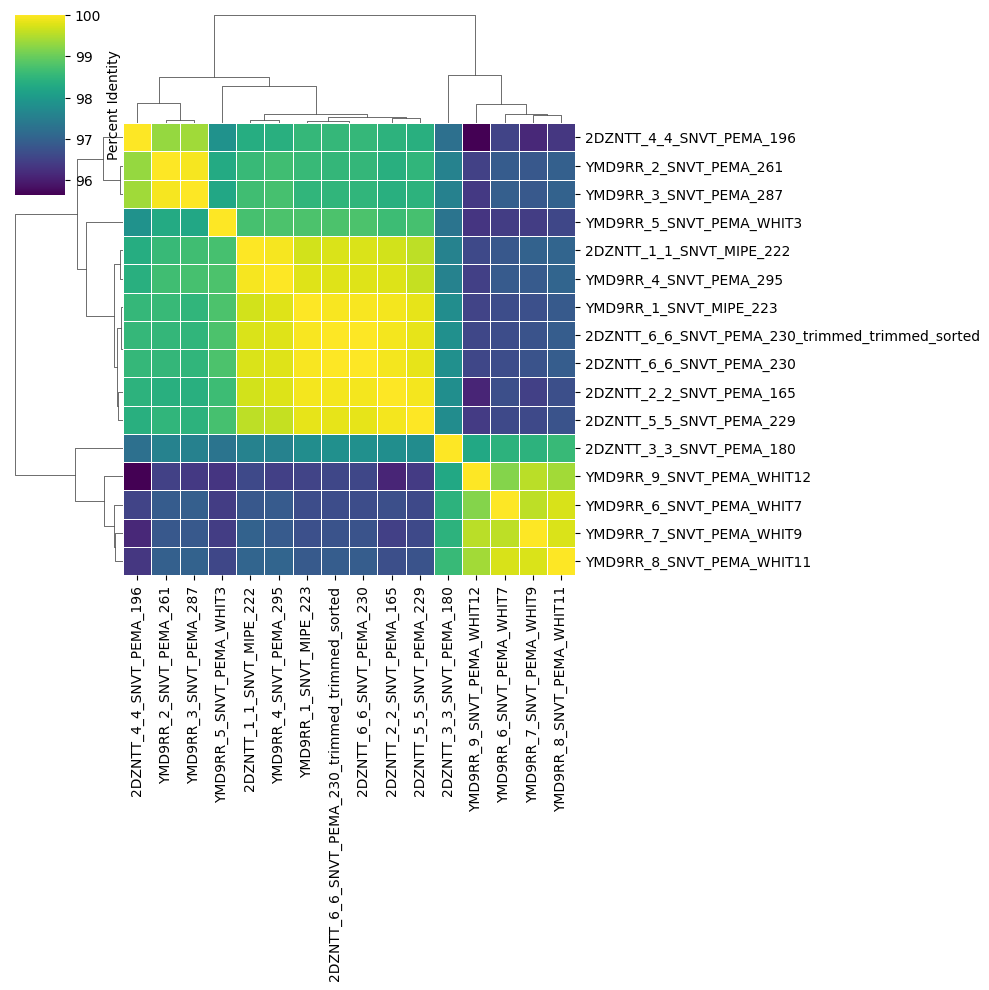

/Users/ricardorivero/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


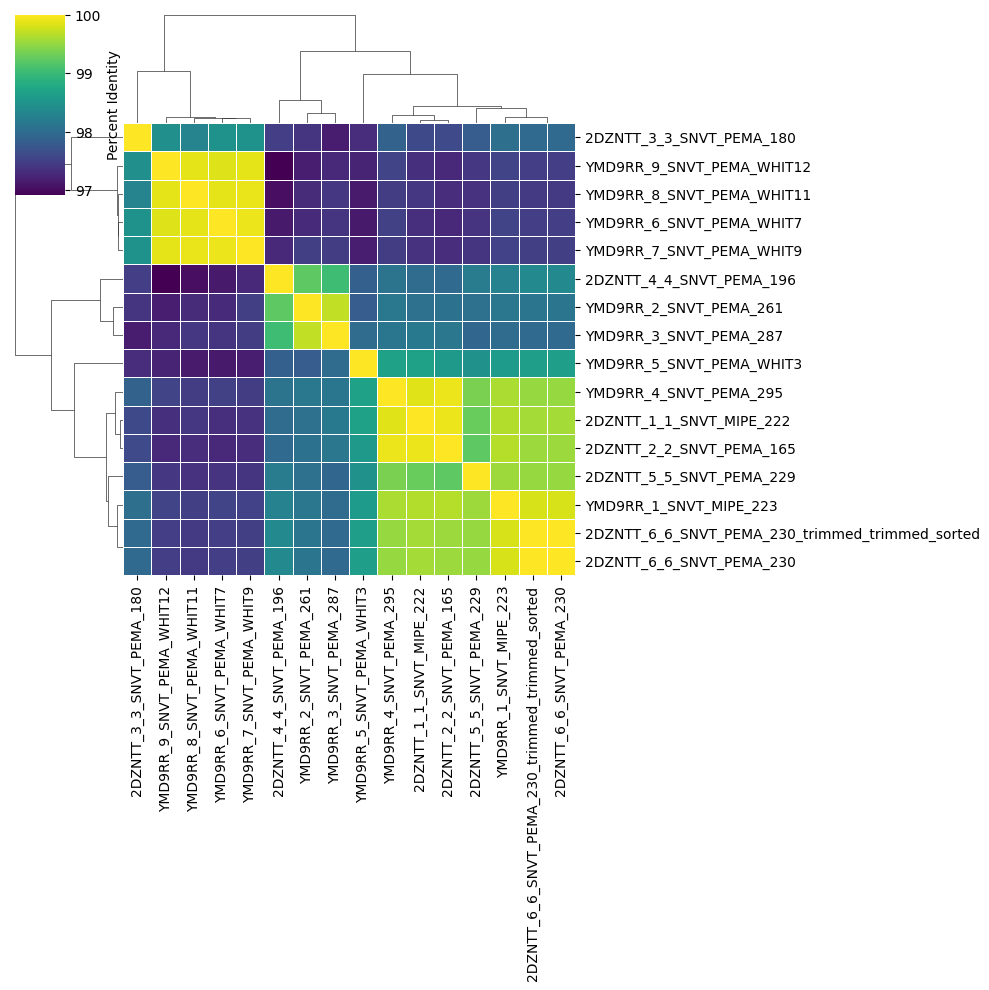

/Users/ricardorivero/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


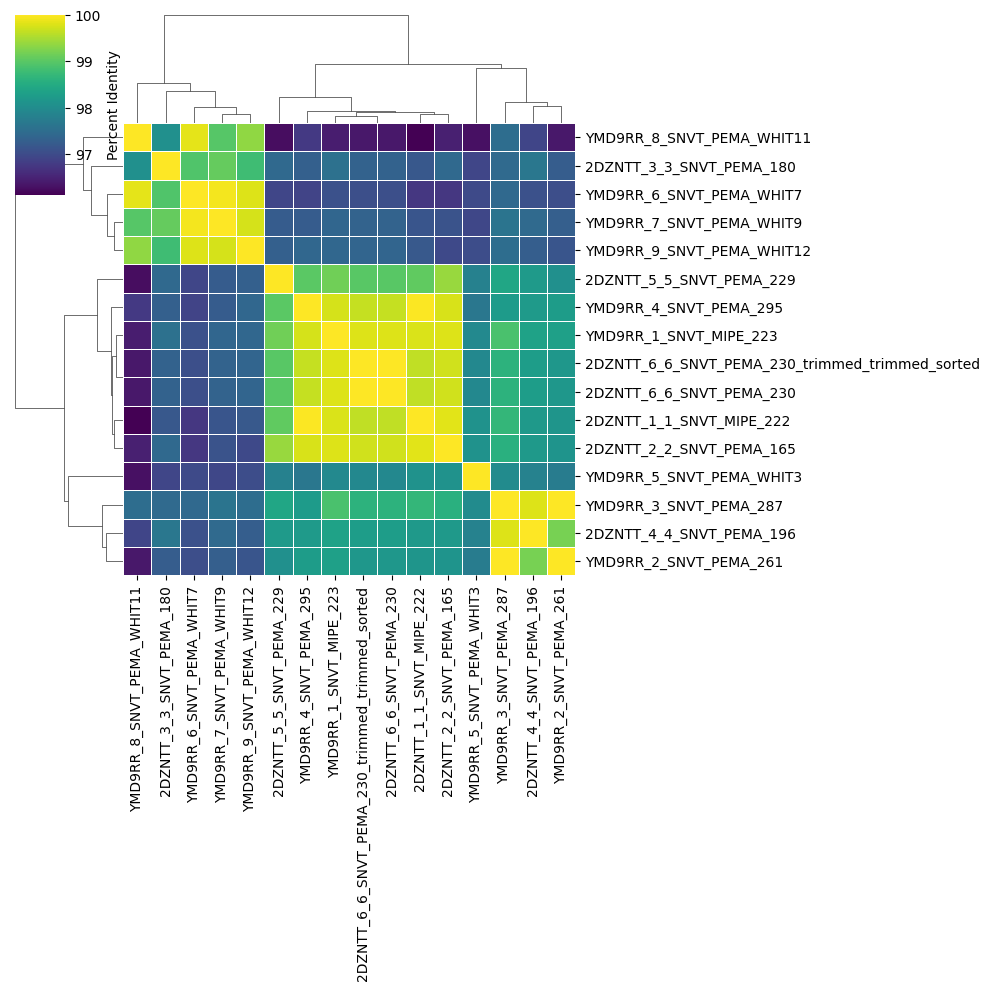

In [12]:
# Set file paths
fasta_files = {
    'S': '../Avail_seqs/Test_new/primerTrimmed_S.aligned.fasta',
    'M': '../Avail_seqs/Test_new/primerTrimmed_M.aligned.fasta',
    'L': '../Avail_seqs/Test_new/primerTrimmed_L.aligned.fasta'
}

identity_matrices = {}

for seg, path in fasta_files.items():
    seqs = load_aligned_fasta(path)
    id_matrix = compute_identity_matrix(seqs)
    identity_matrices[seg] = id_matrix
    plot_clustermap(id_matrix, f'Pairwise Identity Clustermap - Segment {seg}')

In [9]:

sequence_ids = identity_matrices['S'].index
seq_pairs = list(combinations(sequence_ids, 2))

records = []
for id1, id2 in seq_pairs:
    s_idy = identity_matrices['S'].loc[id1, id2]
    m_idy = identity_matrices['M'].loc[id1, id2]
    l_idy = identity_matrices['L'].loc[id1, id2]
    records.append({
        'pair': f"{id1}-{id2}",
        'diff_SM': abs(s_idy - m_idy),
        'diff_SL': abs(s_idy - l_idy),
        'diff_ML': abs(m_idy - l_idy),
        'S_identity': s_idy,
        'M_identity': m_idy,
        'L_identity': l_idy
    })

# Make DataFrame
discrepancy_df = pd.DataFrame.from_records(records)

In [ ]:
discrepancy_df